# Significance Tests
When looking at the modeling we did so far, we saw that some of the important features were categorical. We would like to apply a significance test to see if there are differences in the different groups.

Author: Julia Hammerer, Vanessa Mai 
Last Changes: 09.12.2018

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Significance-Tests" data-toc-modified-id="Significance-Tests-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Significance Tests</a></span><ul class="toc-item"><li><span><a href="#Mann-Whitney-U-Test" data-toc-modified-id="Mann-Whitney-U-Test-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Mann Whitney U Test</a></span></li><li><span><a href="#TT-Test" data-toc-modified-id="TT-Test-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>TT-Test</a></span></li></ul></li></ul></div>

In [1]:
import sys
sys.path.insert(0, '../helper/')

In [2]:
# load packages
%matplotlib inline
import numpy as np
import pandas as pd
import seaborn as sns
import pandas_profiling
import missingno as msno
import matplotlib.pyplot as plt
import plotly.graph_objs as go
import warnings
import math
from scipy.stats import mannwhitneyu
from scipy.stats import ttest_ind
from scipy.stats import kstest

C:\Users\maiv2\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas_profiling\plot.py:15: UserWarning: 
This call to matplotlib.use() has no effect because the backend has already
been chosen; matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

The backend was *originally* set to 'module://ipykernel.pylab.backend_inline' by the following code:
  File "C:\Users\maiv2\AppData\Local\Continuum\anaconda3\lib\runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
  File "C:\Users\maiv2\AppData\Local\Continuum\anaconda3\lib\runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "C:\Users\maiv2\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel\__main__.py", line 3, in <module>
    app.launch_new_instance()
  File "C:\Users\maiv2\AppData\Local\Continuum\anaconda3\lib\site-packages\traitlets\config\application.py", line 658, in launch_instance
    app.start()
  File "C:\Users\maiv

One of the important features was the shelveloc, so we are going to take a look at that. We will test one against all other

In [4]:
# load data
df=pd.read_csv("../data/Carseats.csv")


In [6]:
shelveloc

array(['Bad', 'Good', 'Medium'], dtype=object)

In [5]:
shelveloc=df.ShelveLoc.unique()

In [15]:
df.ShelveLoc.value_counts()

Medium    219
Bad        96
Good       85
Name: ShelveLoc, dtype: int64

## Mann Whitney U Test
Does not necessarily requires a normal distribution

In [9]:
for i in shelveloc:
   stat, p = mannwhitneyu(df[df["ShelveLoc"]==i]["Sales"], df[df["ShelveLoc"]!=i]["Sales"])
   print(i+ " "+ 'Stat=%.3f, p=%.4f' % (stat, p))


Bad Stat=6789.000, p=0.0000
Good Stat=4378.000, p=0.0000
Medium Stat=18613.000, p=0.1473


`Bad` and `Good` seem to be significantly important. For these attributes we can reject the 0-Hypothesis. For medium not being important makes absolute sense as well. 

## TT-Test

In [11]:
for i in  shelveloc:
   stat, p = ttest_ind(df[df["ShelveLoc"]==i]["Sales"], df[df["ShelveLoc"]!=i]["Sales"])
   print(i+ " "+ 'Stat=%.3f, p=%.4f' % (stat, p))


Bad Stat=-8.531, p=0.0000
Good Stat=11.534, p=0.0000
Medium Stat=-1.480, p=0.1396


Same conclusion as above. 

C:\Users\maiv2\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning:

Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.



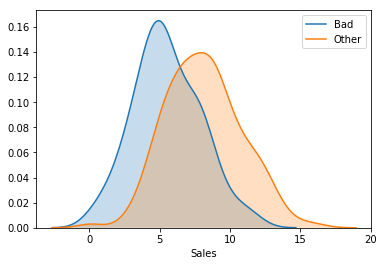

In [17]:
sns.distplot(df.query('ShelveLoc == "Bad"')['Sales'], hist=False, label='Bad ', kde_kws={"shade": True})
sns.distplot(df.query('ShelveLoc != "Bad"')['Sales'], hist=False, label='Other', kde_kws={"shade": True})


`NridgHt`seem to have more expensive houses. 
Another example with `NoRidge`:

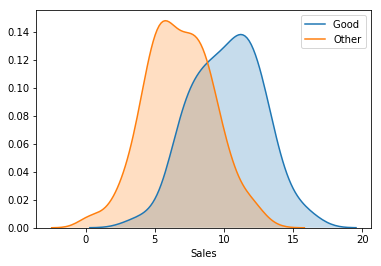

In [19]:
sns.distplot(df.query('ShelveLoc == "Good"')['Sales'], hist=False, label='Good ', kde_kws={"shade": True})
sns.distplot(df.query('ShelveLoc != "Good"')['Sales'], hist=False, label='Other', kde_kws={"shade": True})


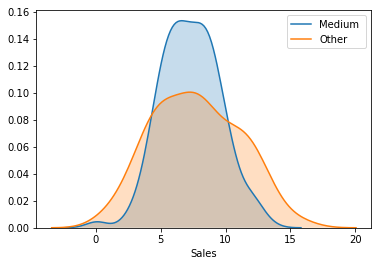

In [20]:
sns.distplot(df.query('ShelveLoc == "Medium"')['Sales'], hist=False, label='Medium ', kde_kws={"shade": True})
sns.distplot(df.query('ShelveLoc != "Medium"')['Sales'], hist=False, label='Other', kde_kws={"shade": True})


Also, recognizable in the plots, the Medium ShelveLoc does not provide any clue for the different Sales. For `Good` and `Bad` there is some "border" between the groups.